In [1]:
!tree -L 2

.
|-- 2_class.ipynb
|-- classification
|   |-- mnist.ipynb
|   `-- \347\214\253\345\222\252\350\257\206\345\210\253\345\231\250.ipynb
|-- data
|   |-- airplane
|   `-- lake
|-- Dataset.ipynb
|-- datasets
|   |-- apples
|   `-- strawberry
|-- first.ipynb
|-- flower_photos.tgz
|-- flowers
|   |-- daisy
|   |-- dandelion
|   |-- LICENSE.txt
|   |-- roses
|   |-- sunflowers
|   `-- tulips
|-- regression
|   |-- edu_income\347\272\277\346\200\247\345\233\236\345\275\222.ipynb
|   |-- Income1.csv
|   |-- \346\210\277\344\273\267\351\242\204\346\265\213.ipynb
|   |-- \347\272\277\346\200\247\345\233\236\345\275\222.ipynb
|   `-- \351\235\236\347\272\277\346\200\247\345\233\236\345\275\222.ipynb
`-- Untitled.ipynb

14 directories, 13 files


In [2]:
import pathlib
import tensorflow as tf
import keras

Using TensorFlow backend.


In [3]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data_path = pathlib.Path('./data')

In [6]:
import random
all_image_path = data_path.glob('*/*')
all_image_path = [str(path) for path in all_image_path]
random.shuffle(all_image_path)
image_count = len(all_image_path)
print(image_count)

1400


In [7]:
all_image_path[:5]

['data/airplane/airplane_341.jpg',
 'data/airplane/airplane_356.jpg',
 'data/lake/lake_518.jpg',
 'data/airplane/airplane_272.jpg',
 'data/lake/lake_275.jpg']

In [8]:
label_names = sorted(item.name for item in data_path.glob('*/') if item.is_dir())
label_to_index = dict((name, index) for index, name in enumerate(label_names))
index_to_label=dict((index,name) for name,index in label_to_index.items())
all_image_label = [label_to_index[pathlib.Path(path).parent.name] for path in all_image_path]

In [9]:
all_image_label[:5]

[0, 0, 1, 0, 1]

In [10]:
ds = tf.data.Dataset.from_tensor_slices((all_image_path, all_image_label))

In [11]:
for path,label in ds.take(5):
    print(path.numpy(),label.numpy())

b'data/airplane/airplane_341.jpg' 0
b'data/airplane/airplane_356.jpg' 0
b'data/lake/lake_518.jpg' 1
b'data/airplane/airplane_272.jpg' 0
b'data/lake/lake_275.jpg' 1


In [12]:
def load_and_preprocess_from_path_label(path, label):
    image = tf.io.read_file(path)  # 读取图片
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [192, 192])  # 原始图片大小为(266, 320, 3)，重设为(192, 192)
    image /= 255.0  # 归一化到[0,1]范围
    return image, label

In [13]:
# 使用AUTOTUNE自动调节管道参数
AUTOTUNE = tf.data.experimental.AUTOTUNE
image_label_ds  = ds.map(load_and_preprocess_from_path_label,num_parallel_calls=AUTOTUNE)

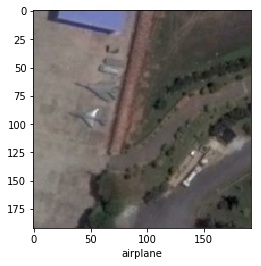

In [14]:
import matplotlib.pyplot as plt

image_path = all_image_path[10]
label = all_image_label[10]

plt.imshow(load_and_preprocess_from_path_label(image_path,label)[0])
plt.grid(False)
plt.xlabel(index_to_label[label])
print()

In [15]:
index_to_label=dict((index,name) for name,index in label_to_index.items())

In [16]:
index_to_label

{0: 'airplane', 1: 'lake'}

In [17]:
load_and_preprocess_from_path_label(image_path,label)

(<tf.Tensor: id=69, shape=(192, 192, 3), dtype=float32, numpy=
 array([[[0.5261438 , 0.51830065, 0.5379085 ],
         [0.5294118 , 0.52156866, 0.5372549 ],
         [0.5163399 , 0.50849676, 0.5137255 ],
         ...,
         [0.2869281 , 0.25163397, 0.26339868],
         [0.2869281 , 0.25163397, 0.26339868],
         [0.28638345, 0.25108933, 0.26285404]],
 
        [[0.53169936, 0.5179739 , 0.5395425 ],
         [0.5323529 , 0.51862746, 0.5362745 ],
         [0.51993465, 0.50784314, 0.51339865],
         ...,
         [0.29052287, 0.25522876, 0.26699346],
         [0.29215688, 0.25686276, 0.26862746],
         [0.29052284, 0.25522873, 0.26699343]],
 
        [[0.5367102 , 0.51710236, 0.53954244],
         [0.5320262 , 0.5124183 , 0.52875817],
         [0.5229847 , 0.50664485, 0.5125272 ],
         ...,
         [0.293573  , 0.25827888, 0.27004358],
         [0.29411766, 0.25882354, 0.27058825],
         [0.29411766, 0.25882354, 0.27058825]],
 
        ...,
 
        [[0.5078431 , 0.4

In [18]:
# 使用AUTOTUNE自动调节管道参数
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [19]:
image_label_ds

<ParallelMapDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int32)>

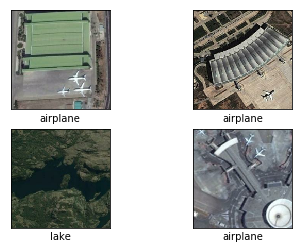

In [20]:
for n,image_label in enumerate(image_label_ds.take(4)):
    plt.subplot(2,2,n+1)
    plt.imshow(image_label[0])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(index_to_label[image_label[1].numpy()])

In [21]:
#数据容量的确定和挑选
test_count = int(image_count*0.2)
train_count = image_count - test_count
print(test_count,train_count)                 #数据容量的确定

280 1120


In [22]:
train_data = image_label_ds.take(train_count)
test_data = image_label_ds.skip(train_count)

In [23]:
BATCH_SIZE = 32
train_data = train_data.apply(tf.data.experimental.shuffle_and_repeat(buffer_size=train_count))
train_data = train_data.batch(BATCH_SIZE)
train_data = train_data.prefetch(buffer_size=AUTOTUNE)
test_data = test_data.batch(BATCH_SIZE)
print(train_data)            #得到最终可以输入到模型的数据

Instructions for updating:
Use `tf.data.Dataset.shuffle(buffer_size, seed)` followed by `tf.data.Dataset.repeat(count)`. Static tf.data optimizations will take care of using the fused implementation.
<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>


In [ ]:
model = tf.keras.Sequential()   #顺序模型
model.add(tf.keras.layers.Conv2D(64, (3, 3), input_shape=(192, 192, 3), activation='relu'))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(1024, (3, 3), activation='relu'))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 190, 190, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 188, 188, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 94, 94, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 92, 92, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 90, 90, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 43, 43, 256)       2

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',  #最后是二分类，特殊的softmax类型
              metrics=['acc']
)

In [ ]:
steps_per_epoch = train_count//BATCH_SIZE
validation_steps = test_count//BATCH_SIZE
history = model.fit(train_data, epochs=3, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_data, validation_steps=validation_steps)

Epoch 1/3
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
